## Number of kids vs. hours worked
Checks whether the number of working hours has an impact of number of kids a person has.

In [46]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import stats

# set path
os.chdir("C:\\Users\\Ayesha\\Desktop\\JPNB Scripts\\MSc\\Hypothesis 1")

In [2]:
# import dataset
data = pd.read_csv("PSID.csv", encoding = 'latin1', low_memory=False)
data.head()

,Seq No,intnum,persnum,age,educatn,earnings,hours,kids,married
0,1,4,4,39,12.0,77250,2940,2,married
1,2,4,6,35,12.0,12000,2040,2,divorced
2,3,4,7,33,12.0,8000,693,1,married
3,4,4,173,39,10.0,15000,1904,2,married
4,5,5,2,47,9.0,6500,1683,5,married


In [53]:
# remove outliers
data = data[data.hours != 0]
data = data[data.kids < 10]

## Visualizations

### Histogram of hours worked

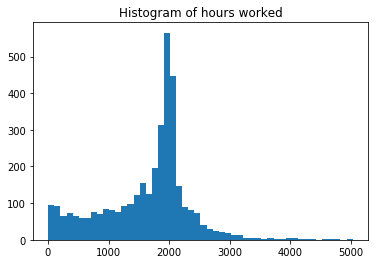

In [18]:
plt.hist(data.hours, bins = 50)
plt.title('Histogram of hours worked')
plt.show()

### Histogram for number of kids

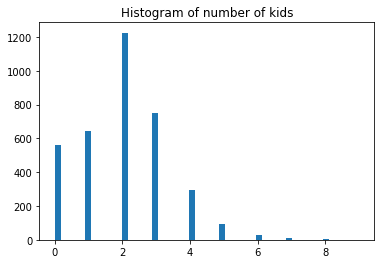

In [29]:
plt.hist(data.kids, bins = 50)
plt.title('Histogram of number of kids')
plt.show()

### Pie chart of number of kids

<function matplotlib.pyplot.show(*args, **kw)>

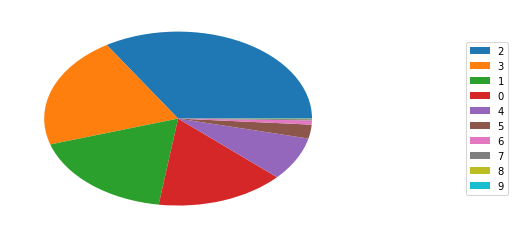

In [28]:
plt.pie(data.kids.value_counts())
labels=data.kids.value_counts().index.tolist()
plt.legend(labels, loc=5,  bbox_to_anchor=(1.5, 0.5))
plt.show

### Scatter plot of number of kids vs. hours worked

Text(0,0.5,'Hours worked')

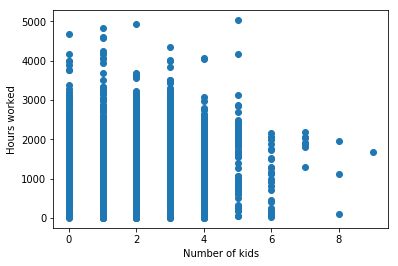

In [35]:
plt.scatter(data.kids, data.hours)
plt.xlabel("Number of kids")
plt.ylabel("Hours worked")

### Group the respondant based on the number of kids they have
Assign 1 if the respondent has more than 2 kids, else assign 0

In [36]:
# create response variable
data['kids_category'] = ([1 if i> 2 else 0 for i in data.kids]) # 1 if more than 2 kids, else 0

### Histogram of hours worked in two groups

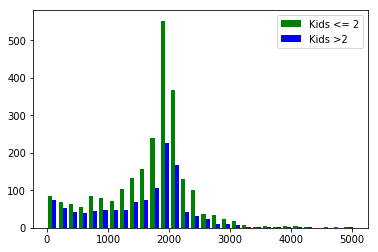

In [39]:
plt.hist([data.hours [data.kids_category == 0],data.hours [data.kids_category == 1]], bins = 30, label = ['Kids <= 2','Kids >2'], color = ['green', 'blue'])
plt.legend(loc='upper right')
plt.show()

## Hypothesis testing (comparing two means)
mean_0 = Average number of hours worked in the group which have less than or equal to 2 kids

mean_1 = Average number of hours worked in the group which have more than 2 kids

H0 : mean_0 = mean_1

H1 : mean_0 != mean_1

In [40]:
mean_0 = data.hours [data.kids_category == 0].mean()
mean_1 = data.hours [data.kids_category == 1].mean()
print(mean_0, mean_1)

1682.641299876594 1534.651103565365


In [41]:
# Get the sample sizes of two groups
data.kids_category.value_counts()

0    2431
1    1178
Name: kids_category, dtype: int64

In [42]:
# get sample hours sd for two groups
sd_0 = data.hours[data.kids_category == 0].std()
sd_1 = data.hours[data.kids_category == 1].std()
print(sd_0, sd_1)

697.3117738604425 766.012381249369


In [44]:
# Under HO, get the test statistic ts
S0 = (sd_0**2)/2431
S1 = (sd_1**2)/1178

ts = (mean_0-mean_1)/((S0+S1)**(1/2))
print(ts)

5.600993356209448


#### t statistic is 5.6

In [47]:
# compute p value
pval = stats.t.sf(np.abs(ts), 2431+1178-1)*2
print(pval)

2.290546624021277e-08


### p-value < 0.05 therefore reject null hypothesis

Therefore we reject H0 in favor of H1 at 5% significance level.
Thus, the test suggests that there is a difference in average working hours between two categories (categories based of number of kids)

# Other analysis

### Chi-square test

In [49]:
# divide the respondants based on the hours worked
# 0 - lesser than the average hours
# 1 - higher than the average hours
data['hours_category'] = ([1 if i> data.hours.mean() else 0 for i in data.hours]) 

In [51]:
# create contingency table
contingency = pd.crosstab(data['hours_category'], data['kids_category'])
print(contingency)

kids_category      0    1
hours_category           
0                867  518
1               1564  660


Chi square test can be applied as all the observed frequencies are greater than 5

Hypothesis

H0: There is no relationship between hours worked (created 2 categories mentioned above) and kids categories.

Ha: There is a relationship between hours worked (created 2 categories mentioned above) and kids categories.

In [52]:
stats.chi2_contingency(contingency)

(22.812097260297154,
 1.7863772344220854e-06,
 1,
 array([[ 932.92740371,  452.07259629],
        [1498.07259629,  725.92740371]]))

calculated p value = 1.7863772344220854e-06 < 0.05

Therefore we reject H0 in favor of H1 at 5% significance level.

Thus, the test suggests that there is a relationship between (created categories above) kids and hours categories.